# Import Module & Dataset

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import spearmanr

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold



from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn import tree
import graphviz

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warning

In [3]:
from google.colab import files
upload = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [48]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 1. Problem Framing

## Q : Business Objective apa yang hendak dicapai melalui proyek ini?

A : Project ini memiliki tujuan untuk memprediksi apakah seorang pelanggan akan membatalkan pesanan nya atau tidak. Hal ini digunakan untuk mengurangi resiko kerugian apabila dilakukan pembatalan pesanan. Kamar-kamar yang kosong akibat pembatalan ini dapat di gunakan oleh pelanggan lain-nya, hanya saja jika informasi pembatalan dilakukan secara tiba-tiba, pihak hotel memiliki kesulitan untuk mengetahui kamar mana saja yang dapat disewakan ke pelanggan lainnya. 


## Q :Keluaran (output) seperti apa yang akan dihasilkan dari proyek ini dan bagaimana end user atau stakeholder akan memanfaatkan keluaran tersebut?

A : Output yang akan dihasilkan dari project ini adalah, apakah seorang pelanggan akan membatalkan pesanan/booking-an kamar hotel nya. End user, yaitu pihak hotel dapat menggunakan informasikan ini sebagai acuan untuk menentukan kamar mana saja yang available untuk digunakan untuk pelanggan baru yang lainnya.

## Q:Machine learning task apa yang akan dikerjakan?

A : Berdasarkan dataset serta output yang ingin dicapai maka project ini akan menggunakan pendekatan supervised. Hal ini dikarenakan tujuan dari project sudah diketahui dengan jelas, yaitu apakah seorang pelanggan akan membatalkan pesanan nya atau tidak. Kemudian masalah ini merupakan masalah yang dapat diselaikan dengan menggunakan classification. Untuk metode yang akan digunakan adalah Logistic Regression, KNN dan decision tree.

## Q :Performance measure apa yang akan digunakan di dalam proyek ini?

A : Performance measure yang akan digunakan dalam proyek ini adalah f1 scoring, accuracy, recall dan precision

## Q : Resiko seperti apa yang mungkin diakibatkan oleh kesalahan prediksi model anda?

A : Terdapat banyak faktor yang dapat menyebabkan model ini tidak applicable sesuai dengan kondisi aktual. MIsalnya, data yang digunakan untuk membangun model ini berasal dari tahun 2015-2017. Sedangkan industri perhotelan cukup fluktuatif dari tahun ke tahun dan banyak faktor yang mempengaruhi. Sehingga,faktor-faktor baru (misal covid 19) bisa membuat model yang telah dibangun tidak cukup valid untuk memprediksi output.

# 2. EDA

### Data null cleansing

In [49]:
df.shape

(119390, 32)

In [50]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [51]:
# Drop kolom company, karena data null sangat banyak dan dianggap tidak valid.
df = df.drop(columns=['company'])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [52]:
# Drop data agent dan country yang null
df = df.dropna()

In [53]:
print(df.shape)
print(df.isnull().sum())

(102894, 31)
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_pa

In [54]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### Data Exploratory

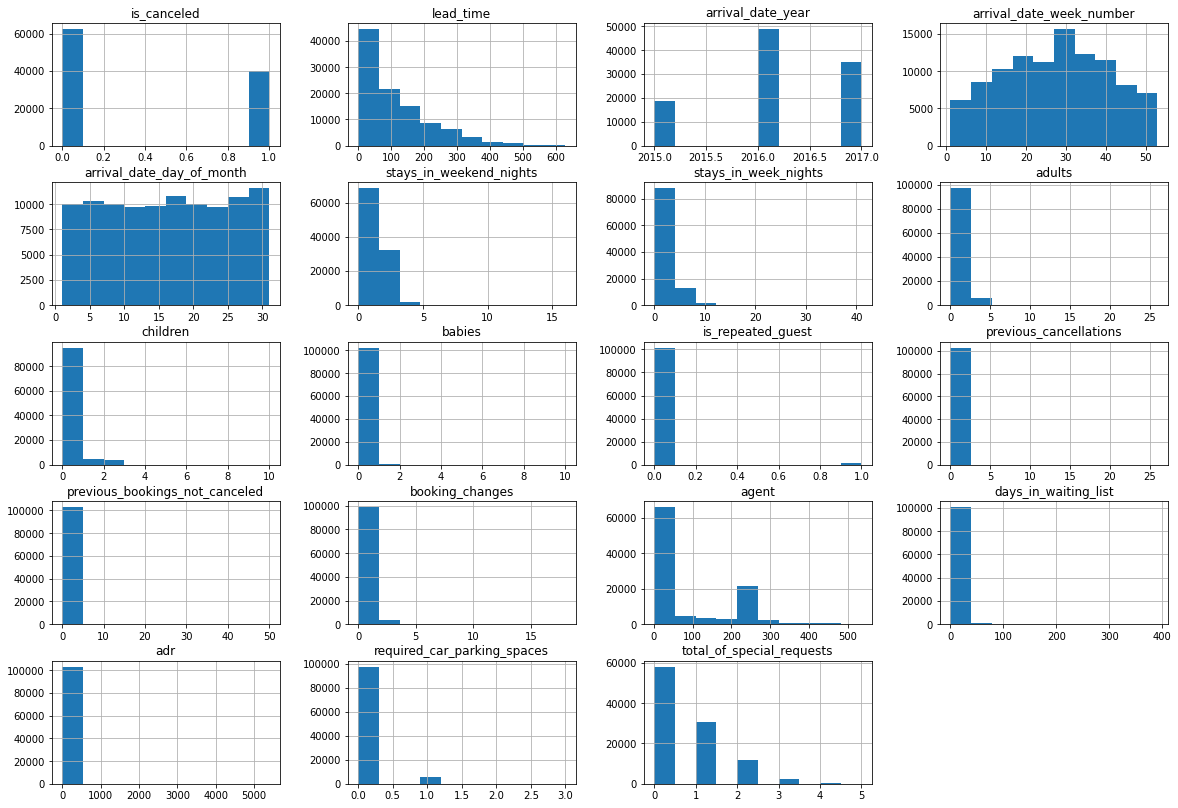

In [124]:
df.hist(figsize=(20,14))
plt.show()

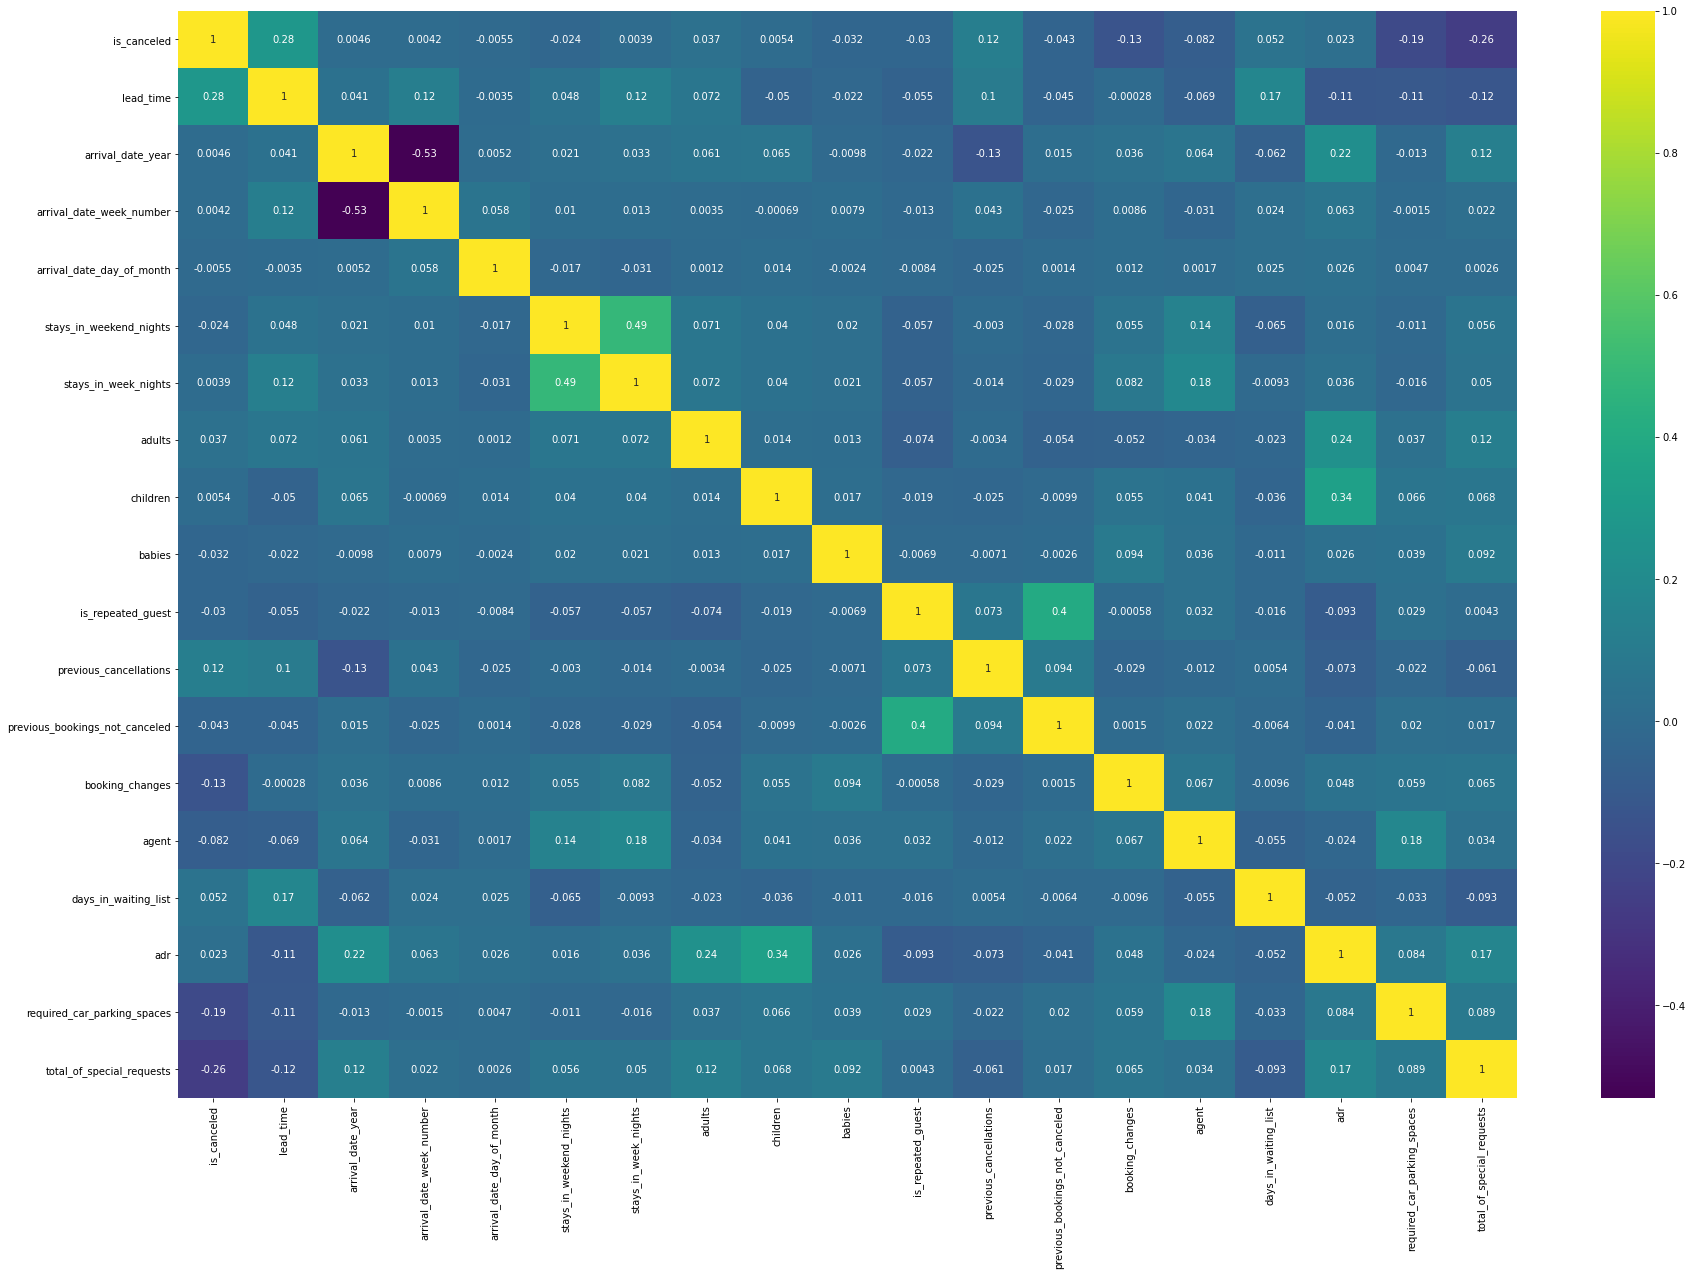

In [125]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.show()

Berdasarkan grafik heatmap, dapat diketahui korelasi antar feature dengan target, yaitu is_cancelled. Menurut andrews university (https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm) idealnya nilai korelasi diatas 0.5, namun pada data hotel_bookings dapat dilihat tidak ada korelasi diatas 0.5 antara bnooking di cancel atau tidak dengan fitur apapun. Oleh karena itu terdapat justifikasi yang diambil yaitu : **Dikarenakan data yang cukup banyak dan keterbatasan resource untuk pengolahan data maka feature yang akan diambil adalah feature dengan nilai korelasi >0.1 atau <-0.1.**


Maka fitur yang akan digunakan adalah :
- Total of special request
- Required car parking spaces
- booking charges
- previous cancelation
- lead times

Selain ke-5 fitur tersebut, ditambahkan juga fitur (non integer) yaitu :
- hotel
- market segment
- distribution channel


In [126]:
df_new = df[['is_canceled','total_of_special_requests','required_car_parking_spaces','booking_changes','previous_cancellations','lead_time','hotel','market_segment','distribution_channel']]
df_new.head()

,is_canceled,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,lead_time,hotel,market_segment,distribution_channel
3,0,0,0,0,0,13,Resort Hotel,Corporate,Corporate
4,0,1,0,0,0,14,Resort Hotel,Online TA,TA/TO
5,0,1,0,0,0,14,Resort Hotel,Online TA,TA/TO
7,0,1,0,0,0,9,Resort Hotel,Direct,Direct
8,1,1,0,0,0,85,Resort Hotel,Online TA,TA/TO


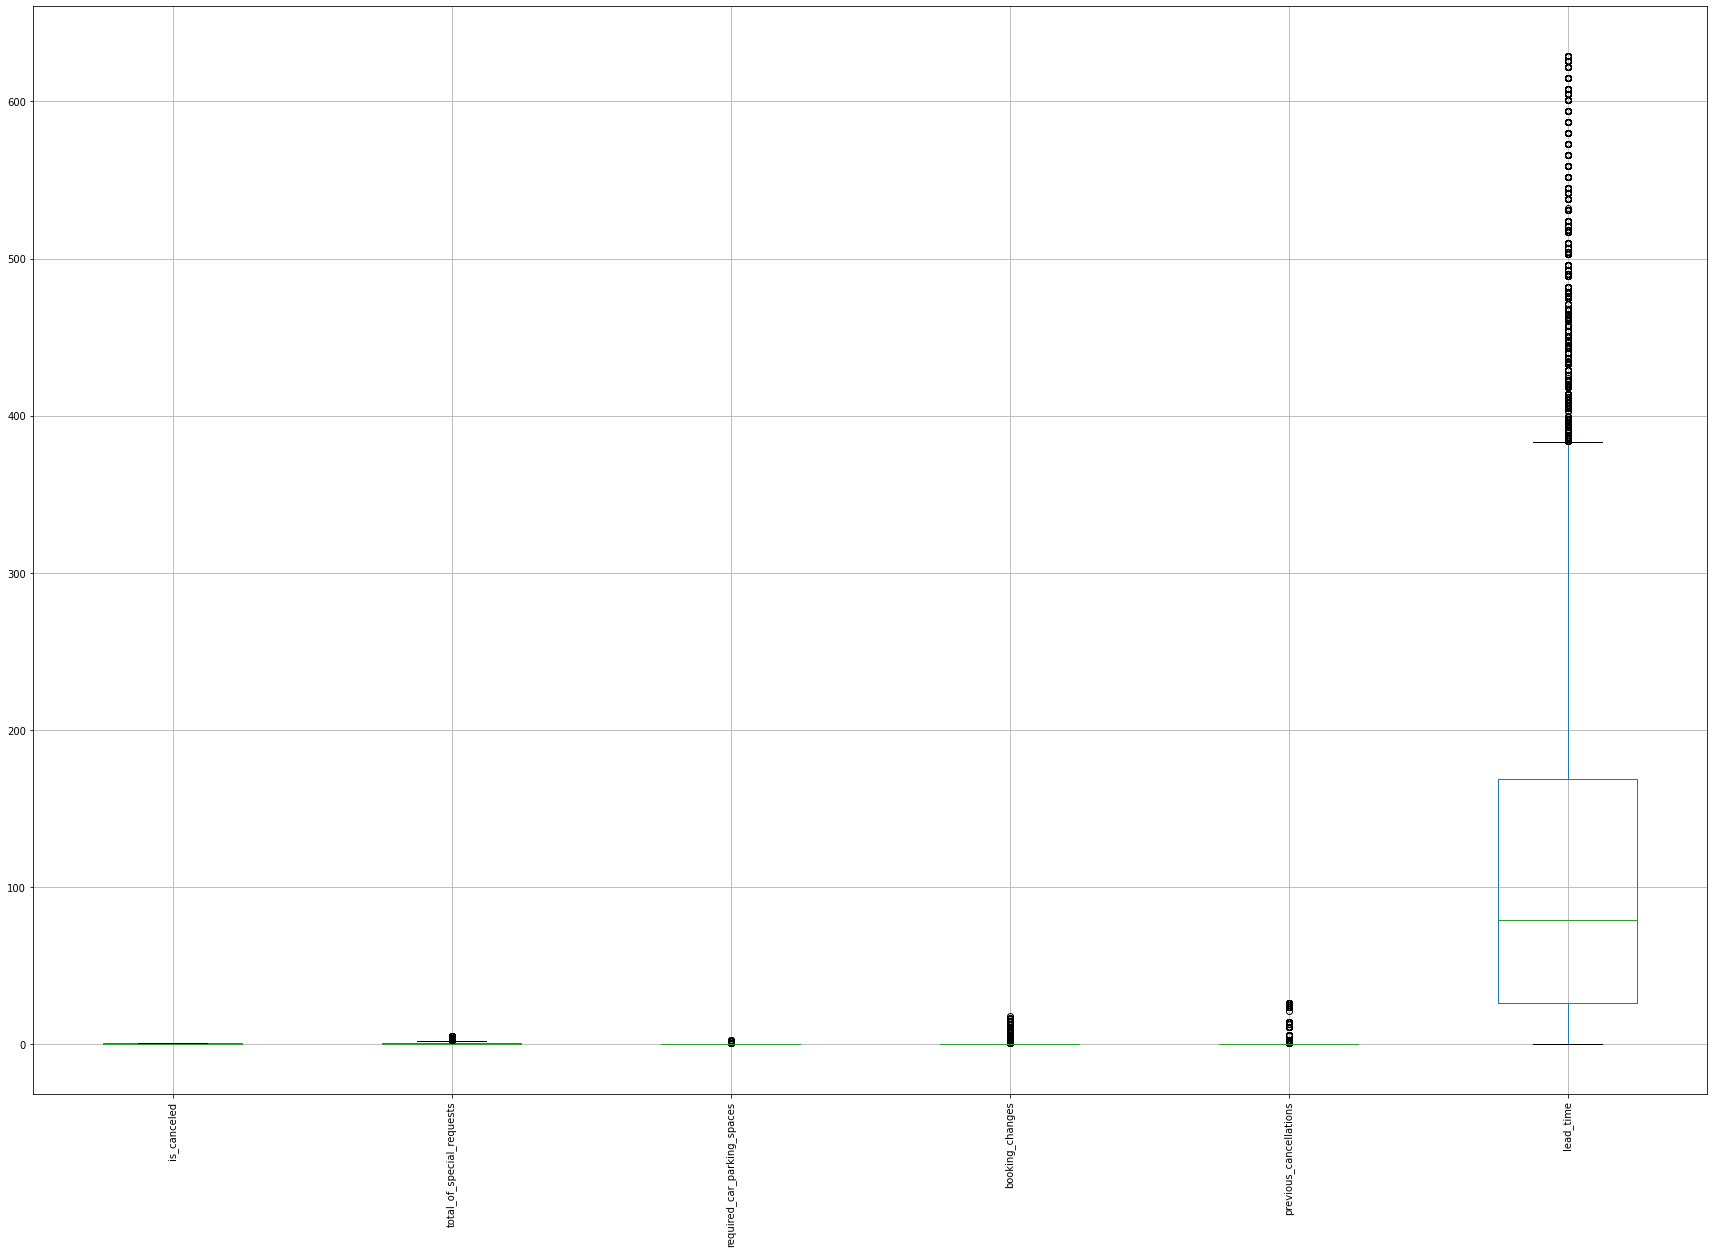

In [127]:
plt.figure(figsize=(30,20))
df_new.boxplot()
plt.xticks(rotation=90)
plt.show()

# 3. Data Preparation

In [128]:
df_new.dtypes

is_canceled                     int64
total_of_special_requests       int64
required_car_parking_spaces     int64
booking_changes                 int64
previous_cancellations          int64
lead_time                       int64
hotel                          object
market_segment                 object
distribution_channel           object
dtype: object

### Scaling Data Numerical

In [129]:
print(df_new['is_canceled'].value_counts())
print(df_new['total_of_special_requests'].value_counts())
print(df_new['required_car_parking_spaces'].value_counts())
print(df_new['booking_changes'].value_counts())
print(df_new['previous_cancellations'].value_counts())
print(df_new['lead_time'].value_counts())

0    62733
1    40161
Name: is_canceled, dtype: int64
0    57956
1    30441
2    11964
3     2232
4      272
5       29
Name: total_of_special_requests, dtype: int64
0    97463
1     5408
2       20
3        3
Name: required_car_parking_spaces, dtype: int64
0     88645
1     10020
2      3037
3       696
4       286
5        83
6        54
7        26
8        14
9         8
10        6
13        5
14        3
15        3
17        2
12        2
16        2
11        1
18        1
Name: booking_changes, dtype: int64
0     97339
1      5384
2        36
26       26
25       25
11       25
24       24
14       14
3         9
6         6
13        4
21        1
5         1
Name: previous_cancellations, dtype: int64
0      2845
1      2318
2      1424
3      1279
4      1228
       ... 
382       1
424       1
463       1
362       1
458       1
Name: lead_time, Length: 475, dtype: int64


Selain column is_canceled, diketahui bahwa nilai min dan max dari column lainnya cukup bervariatif. Contohnya kolom lead time memiliki nilai min 0 dan max 458. Oleh karena itu data perlu di scaling ( 0 - 1), karena salah satu metode yang digunakan adalah KNN. Dan untuk metode KNN akan lebih baik apabila seluruh data sudah discaling.

In [130]:
scaler = MinMaxScaler()
df_new[['total_of_special_requests','required_car_parking_spaces','booking_changes','previous_cancellations','lead_time']] = scaler.fit_transform(df_new[['total_of_special_requests','required_car_parking_spaces','booking_changes','previous_cancellations','lead_time']])

In [131]:
df_new.head()

,is_canceled,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,lead_time,hotel,market_segment,distribution_channel
3,0,0.0,0.0,0.0,0.0,0.020668,Resort Hotel,Corporate,Corporate
4,0,0.2,0.0,0.0,0.0,0.022258,Resort Hotel,Online TA,TA/TO
5,0,0.2,0.0,0.0,0.0,0.022258,Resort Hotel,Online TA,TA/TO
7,0,0.2,0.0,0.0,0.0,0.014308,Resort Hotel,Direct,Direct
8,1,0.2,0.0,0.0,0.0,0.135135,Resort Hotel,Online TA,TA/TO


In [132]:
df_new.isnull().sum()

is_canceled                    0
total_of_special_requests      0
required_car_parking_spaces    0
booking_changes                0
previous_cancellations         0
lead_time                      0
hotel                          0
market_segment                 0
distribution_channel           0
dtype: int64

## Encoding Data Non Numerical

In [133]:
df_new_enc = df_new[['hotel','market_segment','distribution_channel']]
df_new_enc_ohe = pd.get_dummies(df_new_enc)
df_new_enc_ohe.head()

,hotel_City Hotel,hotel_Resort Hotel,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO
3,0,1,0,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,1
5,0,1,0,0,0,0,0,0,1,0,0,0,1
7,0,1,0,0,0,1,0,0,0,0,1,0,0
8,0,1,0,0,0,0,0,0,1,0,0,0,1


## Combining encoded data to dataframe df_new

In [134]:
df_hotel = pd.concat([df_new[['is_canceled','total_of_special_requests','required_car_parking_spaces','booking_changes','previous_cancellations','lead_time',]],df_new_enc_ohe],axis = 1)
df_hotel.head()

,is_canceled,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,lead_time,hotel_City Hotel,hotel_Resort Hotel,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO
3,0,0.0,0.0,0.0,0.0,0.020668,0,1,0,0,1,0,0,0,0,1,0,0,0
4,0,0.2,0.0,0.0,0.0,0.022258,0,1,0,0,0,0,0,0,1,0,0,0,1
5,0,0.2,0.0,0.0,0.0,0.022258,0,1,0,0,0,0,0,0,1,0,0,0,1
7,0,0.2,0.0,0.0,0.0,0.014308,0,1,0,0,0,1,0,0,0,0,1,0,0
8,1,0.2,0.0,0.0,0.0,0.135135,0,1,0,0,0,0,0,0,1,0,0,0,1


# 4. Model Training

In [76]:
#Create target and features
X = df_hotel.drop(columns = ['is_canceled'])
y = df_hotel['is_canceled']

In [77]:
#Create test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2020)

In [79]:
#Create Classifiers 
logreg_std = LogisticRegression()
knn_std = KNeighborsClassifier()
dt_std = DecisionTreeClassifier()

In [81]:
#Check cross validation score
skfold = StratifiedKFold(n_splits = 5)
log_cv = cross_val_score(logreg_std,X_train,y_train,cv=skfold)
knn_cv = cross_val_score(knn_std,X_train,y_train,cv=skfold)
dt_cv = cross_val_score(dt_std,X_train,y_train,cv=skfold)

In [82]:
print ('Log_cv = ',log_cv.mean())
print ('knn_cv = ',knn_cv.mean())
print ('dt_cv = ',dt_cv.mean())

Log_cv =  0.7378965636931621
knn_cv =  0.7727455744533149
dt_cv =  0.78707393266227


In [86]:
#Train Model
logreg_std.fit(X_train,y_train)
y_pred_log_std = logreg_std.predict(X_test)
print('Logreg Classification Report')
print(classification_report(y_test,y_pred_log_std))
knn_std.fit(X_train,y_train)
y_pred_knn_std = knn_std.predict(X_test)
print('KNN Classification Report')
print(classification_report(y_test,y_pred_knn_std))
dt_std.fit(X_train,y_train)
y_pred_dt_std = dt_std.predict(X_test)
print('Decision Tree Classification Report')
print(classification_report(y_test,y_pred_dt_std))

Logreg Classification Report
              precision    recall  f1-score   support

           0       0.75      0.85      0.80     18824
           1       0.71      0.56      0.62     12045

    accuracy                           0.74     30869
   macro avg       0.73      0.70      0.71     30869
weighted avg       0.73      0.74      0.73     30869

KNN Classification Report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     18824
           1       0.73      0.67      0.70     12045

    accuracy                           0.77     30869
   macro avg       0.76      0.75      0.76     30869
weighted avg       0.77      0.77      0.77     30869

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     18824
           1       0.75      0.68      0.72     12045

    accuracy                           0.79     30869
   macro avg       0.78      0.77    

# 5. Evaluation, Model Selection and Model Tuning

### Evaluation

Berdasarkan proses training (standard tanpa tuning) dapat diketahui bahwa model decision tree memiliki nilai cv score yang tertinggi. Hal ini berarti, dari data yang ada, decisin tree merupakan metode yang paling tepat meskipun data set yang diambil dirandom beberapa kali. Selanjutnya, hal ini juga dibuktikan dengan nilai precision, recall dan f1 score yang lebih baik dibandingkan 2 metode lainnya. 

Oleh karena itu, selanjutnya untuk mengimprove model yang dibuat, proses tuning akan dilakukan dengan menggunakan model  **decision tree**

### Hyperparameter selection using Grid Search CV

Proses pemilihan hyperparameter akan menggunakan metode gridsearch cv. Meskipun gridsearch membutuhkan waktu lebih lama dibandingkan randomize search, namun tingkat akurasi nya lebih tinggi. Hal ini dikarenakan gridsearch melakukan kombinasi secara keseluruhan terhadap faktor/estimator yang ada dari model. Oleh karena itu, proses penentuan hyperparameter menggunakan gridsearch.

In [87]:
param_grid = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=2020), param_grid, verbose=1, cv=5)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=2020,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

In [88]:
grid_search_cv.best_params_

{'max_leaf_nodes': 99, 'min_samples_split': 2}

In [89]:
grid_search_cv.best_score_

0.7791183616799723

In [90]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=99,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2020, splitter='best')

Setelah dilakukan proses pemilihan estimator menggunakan gridsearch diketahui best estimator dan best score sebesar 0.779. 

### Apply best estimator to Decision Tree Model

In [91]:
dt_best = grid_search_cv.best_estimator_.fit(X_train,y_train)
y_pred_dt_best = dt_best.predict(X_test)
print(classification_report(y_test,y_pred_dt_best))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     18824
           1       0.76      0.63      0.69     12045

    accuracy                           0.78     30869
   macro avg       0.77      0.75      0.76     30869
weighted avg       0.78      0.78      0.77     30869



# 6. Result, Conclusion and Recomendation

Berdasarkan proses training yang telah dilakukan, diketahui bahwa metode decision tree memiliki score yang lebih tinggi dibandingkan metode KNN dan logistic regression. Selain itu metode decision tree juga mensupport proses interaksi antar feature automatically (https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222)


In [97]:
#classification report dimasukan ke csv
from google.colab import files
upload = files.upload()

Saving clas report.csv to clas report (1).csv


In [98]:
cr_dt_best_std= pd.read_csv('clas report (1).csv')
cr_dt_best_std

,Data,dt_best,dt_std
0,Precision,0.76,0.75
1,Recall,0.63,0.68
2,F1 Score,0.69,0.72


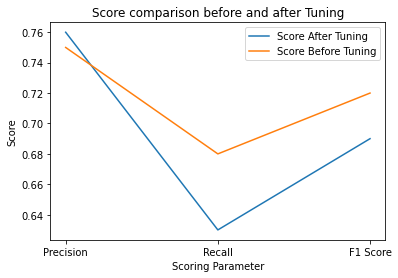

In [123]:
sns.lineplot(data=cr_dt_best_std,x='Data',y='dt_best')
sns.lineplot(data=cr_dt_best_std,x='Data',y='dt_std')
plt.xlabel('Scoring Parameter')
plt.ylabel('Score')
plt.title('Score comparison before and after Tuning')
plt.legend(['Score After Tuning','Score Before Tuning'])
plt.show()

Setelah proses tuning, diketahui nilai akurasi meningkat sebesar 0.1. Hal ini sudah sesuai dengan perkiraan awal, karena hyperparameter yang di tuning semakin banyak maka tingkat presisi dari model tentu saja akan meningkat juga. 

Dari grafik diatas dapat diketahui juga dari seluruh pelanggan yang akan melakukan cancel, model berhasil memprediksi 76% akan melakukan pembatalan dari seluruh total pelanggan yang membatalkan (precision).Tentu saja akan ada trade off, seiring meningkatnya precision maka recall bisa saja menurun. 

Dikarenakan pada saat ini sedang terjadi pandemi, maka saya memilih untuk mementingkan tingkat akurasi dibanding recall. Karena, akan ada tendensi pelanggan membatalkan pesanan nya. 

Berdasarkan plot decision tree setelah di tuning, diketahui bahwa penentu awal apakah pelanggan akan membatalkan pesanan nya atau tidak adalah feature previous cancelation. Tentu saja jika dai data history sering melakukan pembatalan, maka pelanggan memiliki tendensi untuk melakukan cancelation kembali. 

**Recommendation**
*   Model ini hanya dapat memperkirakan apakah pelanggan akan membatalkan pesanan nya atau tidak
*   Dikarenakan saat ini sedang terjadi pandemi COVID 19,sebaiknya dilakukan masa percobaan/trial model dalam jangka waktu tertentu untuk memprediksi apakah model valid dengan situasi saat ini.
*   Melakukan evaluasi kembali setelah trial dan menambahkan feature baru yang mungkin terlewat dari penelitian awal
*   Apabila memungkinkan membuat dataset baru yang berisi nilai kerugian saat ini (berdasarkan dataset existing) dan setelah model di trial untuk melihat apakah model dapat digunakan untuk mengurangi nilai kerugian hotel.





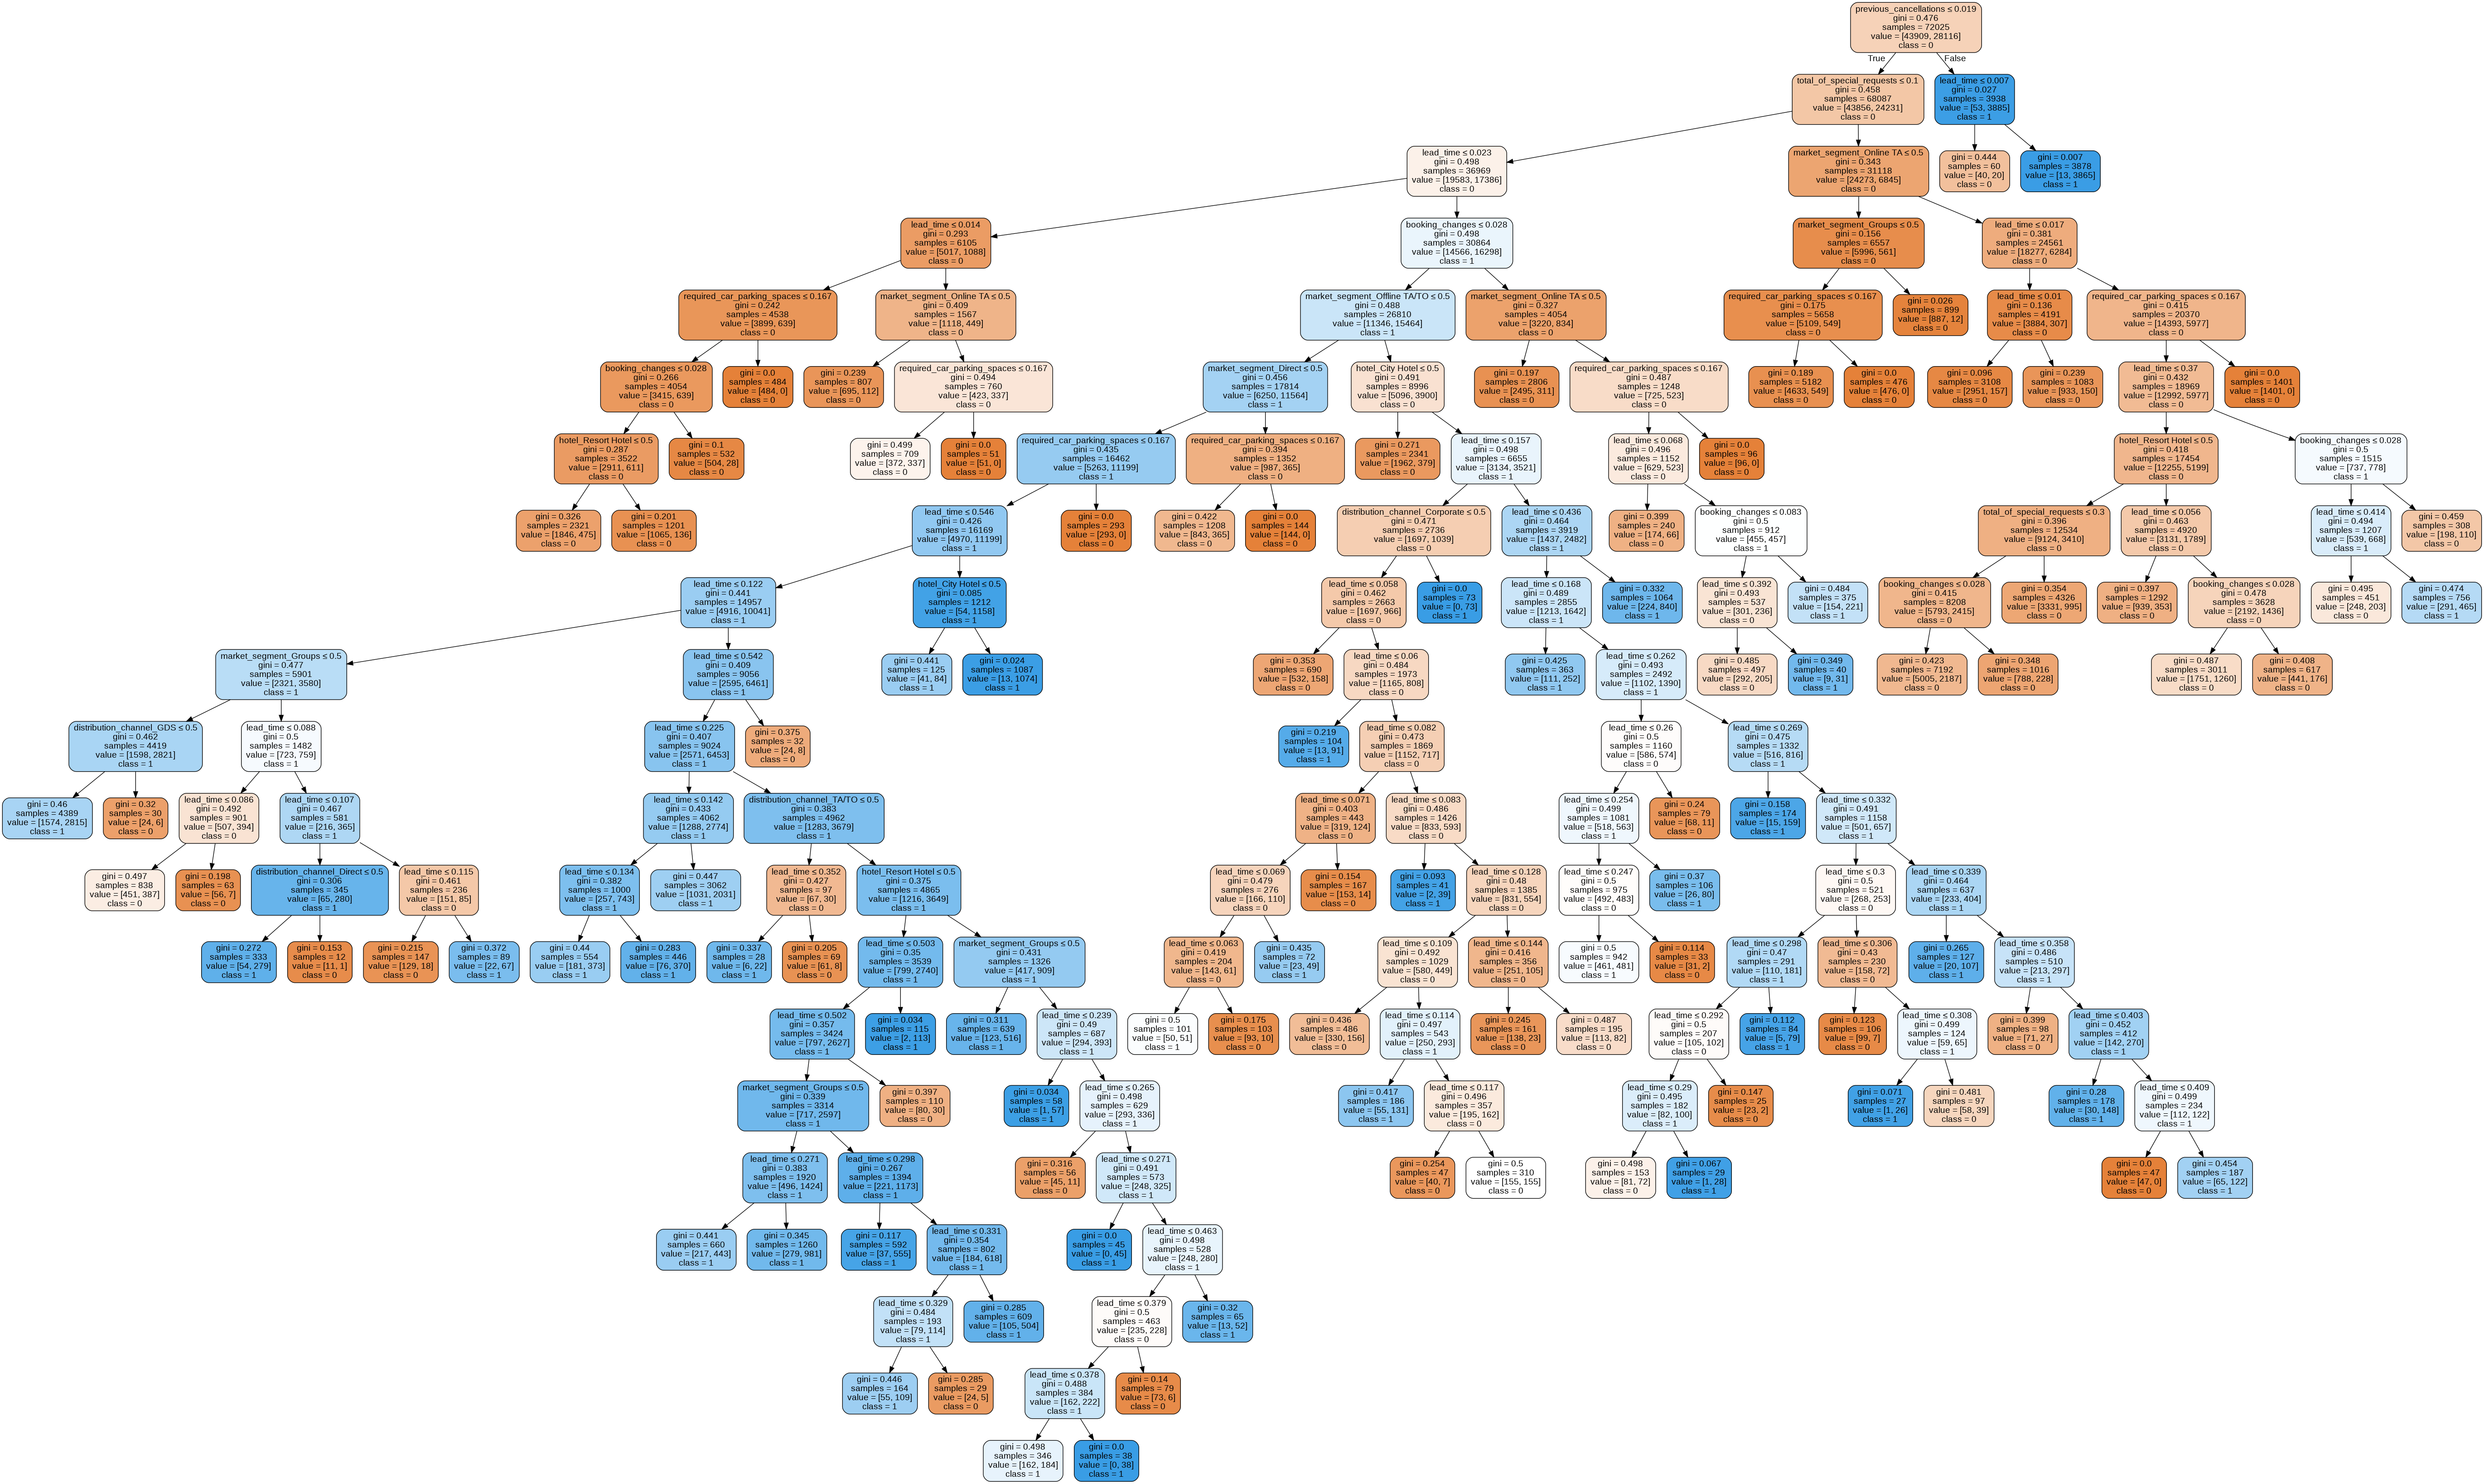

In [122]:
dot_data = StringIO()
export_graphviz(dt_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['total_of_special_requests',
       'required_car_parking_spaces', 'booking_changes',
       'previous_cancellations', 'lead_time', 'hotel_City Hotel',
       'hotel_Resort Hotel', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())